C:\Users\arda.yesilcimen\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arda.yesilcimen\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arda.yesilcimen\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arda.yesilcimen\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

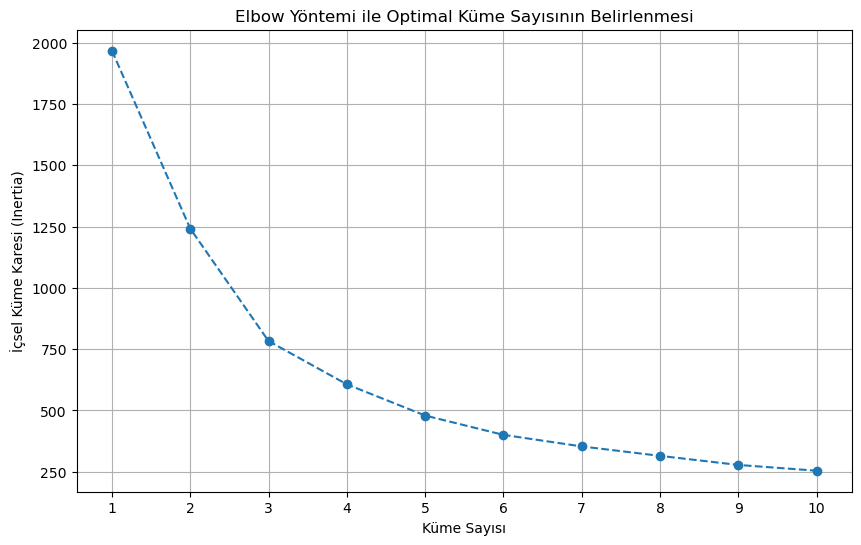

C:\Users\arda.yesilcimen\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


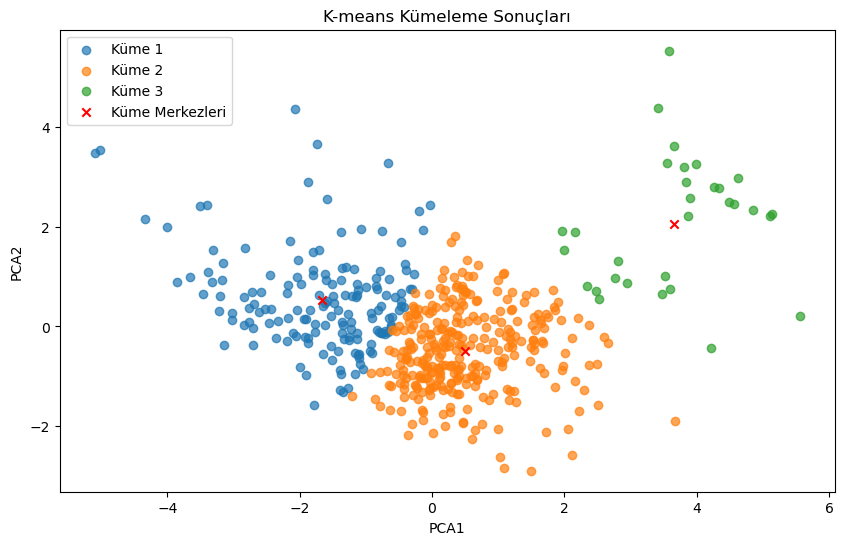

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Veriyi yükle
data = pd.read_excel(r'xxxxxxxxxxxxxxxxxxxxxxxxxxx')

# 'İstasyon Kodu' sütununu veriden çıkar
data_cleaned = data.drop(columns=['İstasyon Kodu'])

# Veriyi ölçeklendir
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Temel Bileşen Analizi (PCA) uygula
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Elbow yöntemini kullanarak optimal küme sayısını belirle
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Elbow yönteminin sonuçlarını görselleştir
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı')
plt.ylabel('İçsel Küme Karesi (Inertia)')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısının Belirlenmesi')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Optimal küme sayısını 3 olarak belirle
n_clusters = 3

# K-means algoritmasını kullanarak kümeleme yap
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_pca)

# Kümeleme sonuçlarını görselleştir
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(data_pca[cluster_labels == cluster_label, 0], 
                data_pca[cluster_labels == cluster_label, 1], 
                label=f'Küme {cluster_label+1}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='x', label='Küme Merkezleri')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Kümeleme Sonuçları')
plt.legend()
plt.show()
